In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# And libraries for data transformation
import datetime

#words counter
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.tokenize import word_tokenize


# sentiment 
from textblob import TextBlob


In [2]:
# load data
df = pd.read_csv('test_data/2020-04-16tweets-covid-19.csv')
df.head()

,screen_name,created_at,location,source,hashtags,text
0,amyscus1,2020-04-16 22:55:16,USA,Twitter Web App,NaN,"@eugenegu @realDonaldTrump To 4/15, more than ..."
1,MarlaMayes,2020-04-16 22:55:16,Middle Georgia,Twitter for iPad,NaN,With the goal to measure the prevalence of the...
2,MissIsabelC,2020-04-16 22:55:16,"Los Angeles, CA",Twitter for iPhone,NaN,“Chicago hospital treating severe Covid-19 pat...
3,midnightcelt,2020-04-16 22:55:16,"Kentucky, USA",Twitter for iPhone,"Covid_19, coronavirus, business, DigitalMarket...",7 Predictions for a Post-Coronavirus World - M...
4,evan_cofer,2020-04-16 22:55:15,"Princeton, NJ",Twitter for Android,NaN,Fast Grants (https://t.co/vEd27V4oE1) 1 week i...


# Data preprocess

In [3]:
# Get length of review for Exploratory data analysis (EDA)
df['text_length'] = df['text'].apply(lambda x: len(x))

Text(0.5, 1.0, 'Distribution of review length')

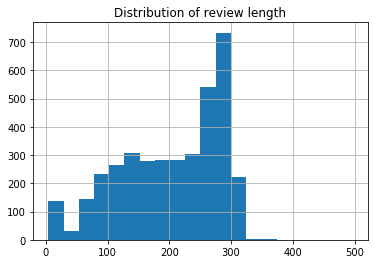

In [4]:
# And take a look at the distribution of the length
df['text_length'].hist(bins=20)
plt.title('Distribution of review length')

In [5]:
from string import punctuation
from nltk.corpus import stopwords

# Transform string data and remove punctuation and stop words
df['text_clean'] = df['text']
# lower case
df['text_clean'] = df['text_clean'].apply(lambda x: str(x).lower())
# remove punctuation
df['text_clean'] = df['text_clean'].apply(lambda x: x.translate(str.maketrans('', '', punctuation)))
# remove stop words
nltk_stop = stopwords.words('english')                                          
df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([c for c in x.split() if c not in nltk_stop]))

In [6]:
# Check the data again
df.head()

,screen_name,created_at,location,source,hashtags,text,text_length,text_clean
0,amyscus1,2020-04-16 22:55:16,USA,Twitter Web App,NaN,"@eugenegu @realDonaldTrump To 4/15, more than ...",312,eugenegu realdonaldtrump 415 33 million covid1...
1,MarlaMayes,2020-04-16 22:55:16,Middle Georgia,Twitter for iPad,NaN,With the goal to measure the prevalence of the...,238,goal measure prevalence covid19 infection amon...
2,MissIsabelC,2020-04-16 22:55:16,"Los Angeles, CA",Twitter for iPhone,NaN,“Chicago hospital treating severe Covid-19 pat...,283,“chicago hospital treating severe covid19 pati...
3,midnightcelt,2020-04-16 22:55:16,"Kentucky, USA",Twitter for iPhone,"Covid_19, coronavirus, business, DigitalMarket...",7 Predictions for a Post-Coronavirus World - M...,184,7 predictions postcoronavirus world marker cov...
4,evan_cofer,2020-04-16 22:55:15,"Princeton, NJ",Twitter for Android,NaN,Fast Grants (https://t.co/vEd27V4oE1) 1 week i...,253,fast grants httpstcoved27v4oe1 1 week • 4000 a...


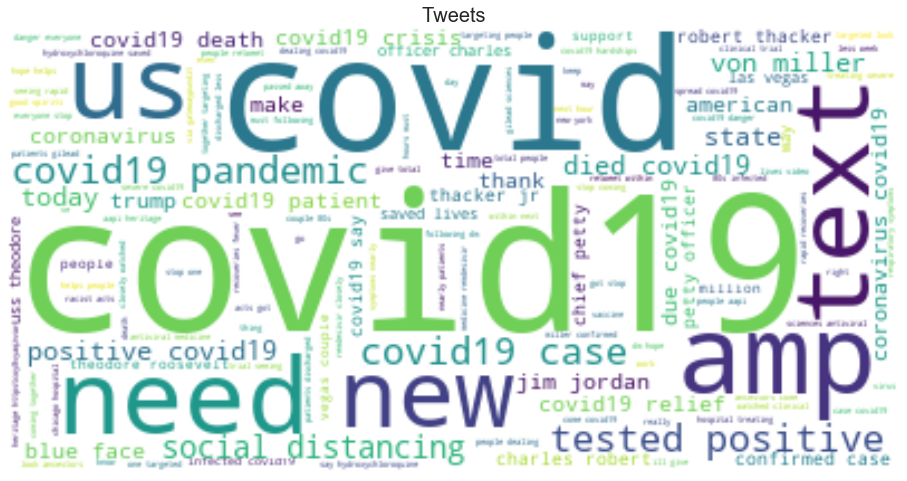

In [7]:
#words cloud of most comman words 
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'].tolist())

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Tweets',size=20)
plt.show()

# Sentiment
Use testblob for sentiment analysis

In [8]:
# TextBlob stands on the giant shoulders of NLTK and pattern, and plays nicely with both.
# Here, we only extract polarity as it indicates the sentiment 
# as value nearer to 1 means a positive sentiment 
# values nearer to -1 means a negative sentiment. 
# This can also work as a feature for building a machine learning model.
df['sentiment_score'] = df['text_clean'].apply(lambda x: TextBlob(x).sentiment[0])
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')
df['sentiment_category'] = df['sentiment_score'].apply(lambda x: 1 if x > 0 else 2 if x < 0 else 0)
df[['text_clean','sentiment_score', 'sentiment', 'sentiment_category']].head()

,text_clean,sentiment_score,sentiment,sentiment_category
0,eugenegu realdonaldtrump 415 33 million covid1...,0.034722,positive,1
1,goal measure prevalence covid19 infection amon...,0.081250,positive,1
2,“chicago hospital treating severe covid19 pati...,-0.033333,negative,2
3,7 predictions postcoronavirus world marker cov...,0.000000,neutral,0
4,fast grants httpstcoved27v4oe1 1 week • 4000 a...,0.200000,positive,1


In [9]:
df.head()

,screen_name,created_at,location,source,hashtags,text,text_length,text_clean,sentiment_score,sentiment,sentiment_category
0,amyscus1,2020-04-16 22:55:16,USA,Twitter Web App,NaN,"@eugenegu @realDonaldTrump To 4/15, more than ...",312,eugenegu realdonaldtrump 415 33 million covid1...,0.034722,positive,1
1,MarlaMayes,2020-04-16 22:55:16,Middle Georgia,Twitter for iPad,NaN,With the goal to measure the prevalence of the...,238,goal measure prevalence covid19 infection amon...,0.081250,positive,1
2,MissIsabelC,2020-04-16 22:55:16,"Los Angeles, CA",Twitter for iPhone,NaN,“Chicago hospital treating severe Covid-19 pat...,283,“chicago hospital treating severe covid19 pati...,-0.033333,negative,2
3,midnightcelt,2020-04-16 22:55:16,"Kentucky, USA",Twitter for iPhone,"Covid_19, coronavirus, business, DigitalMarket...",7 Predictions for a Post-Coronavirus World - M...,184,7 predictions postcoronavirus world marker cov...,0.000000,neutral,0
4,evan_cofer,2020-04-16 22:55:15,"Princeton, NJ",Twitter for Android,NaN,Fast Grants (https://t.co/vEd27V4oE1) 1 week i...,253,fast grants httpstcoved27v4oe1 1 week • 4000 a...,0.200000,positive,1


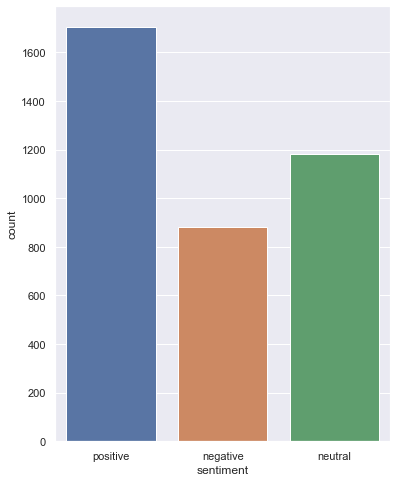

In [10]:
plt.figure(figsize=(6,8))
sns.countplot(x='sentiment', data=df)
plt.show()

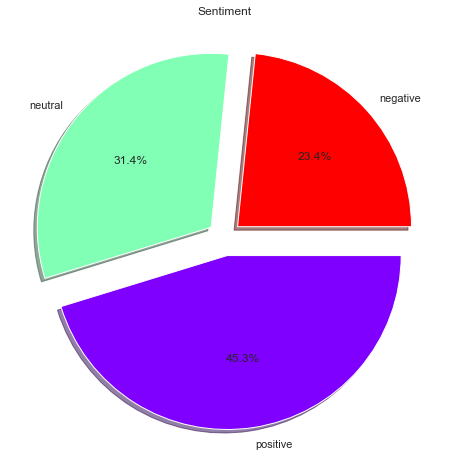

In [11]:
import matplotlib.cm as cm
plt.figure(figsize=(8,8))
#count data rating
counts = df['sentiment'].value_counts()
#rating pie
values = counts.values
labels = counts.index
explode = (0.1, 0.1, 0.1)
colors = cm.rainbow(np.linspace(0, 1, len(labels)))
plt.pie(values, 
        colors=colors, 
        labels=labels,
        explode=explode, 
        autopct='%1.1f%%',
        counterclock=False,
        shadow=True)
plt.title('Sentiment')
plt.show()

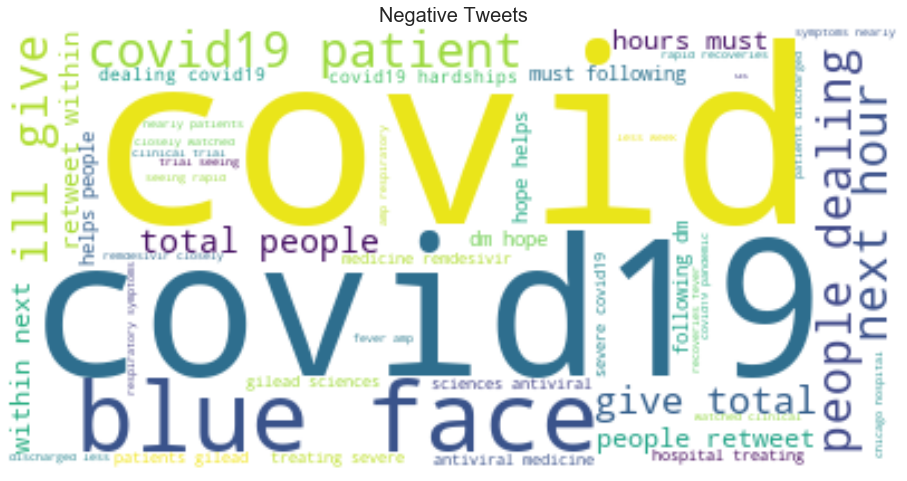

In [12]:
#words cloud of most comman words from negative tweets
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='negative'].tolist())

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Negative Tweets',size=20)
plt.show()

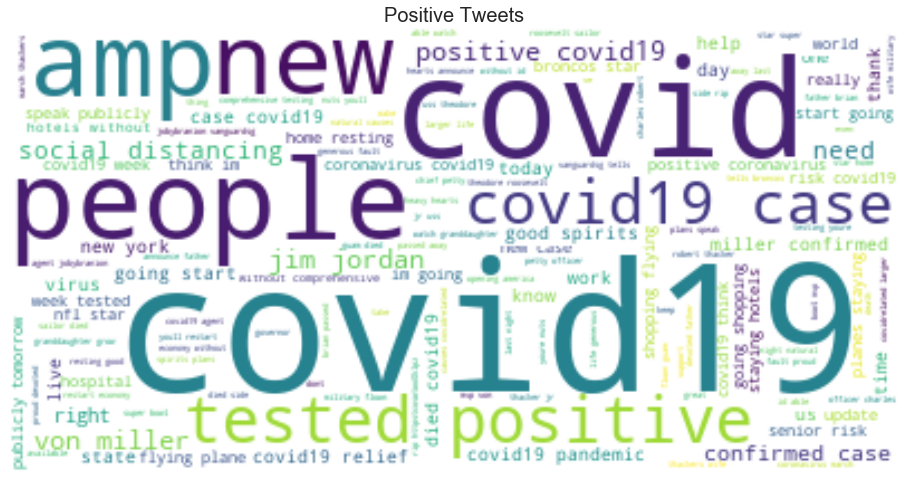

In [13]:
#words cloud of most comman words from positive tweets
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='positive'].tolist())

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Positive Tweets',size=20)
plt.show()

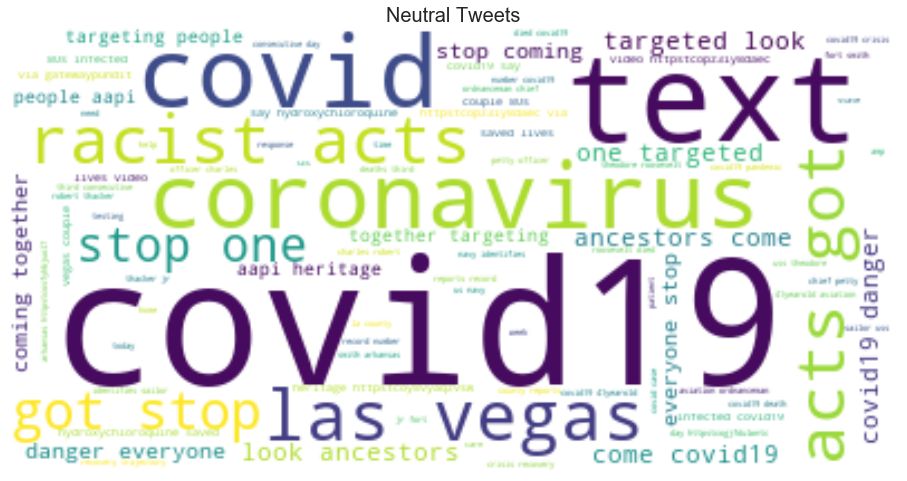

In [14]:
#words cloud of most comman words from neutral tweets
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='neutral'].tolist())

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Neutral Tweets',size=20)
plt.show()